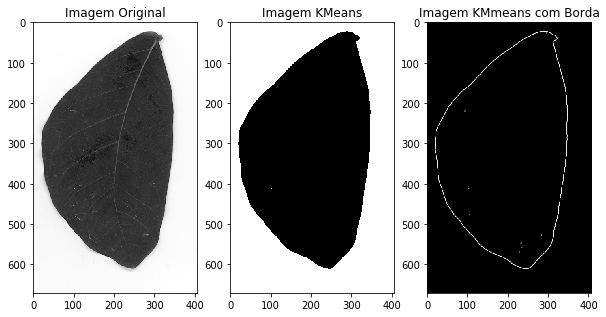

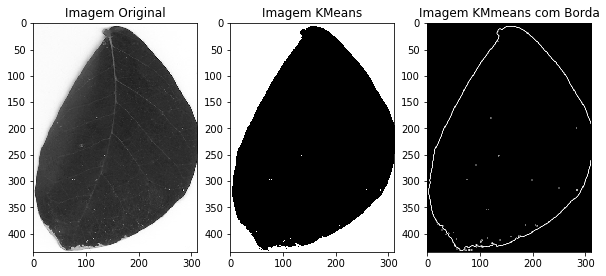

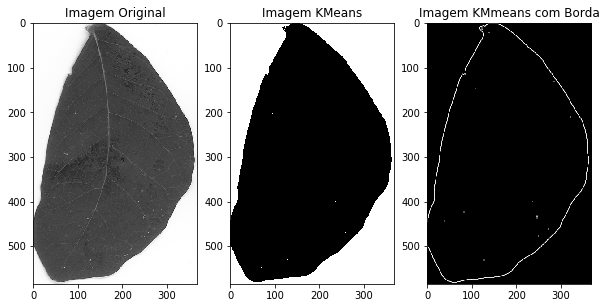

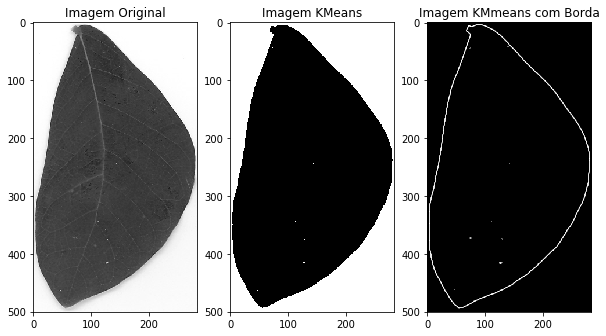

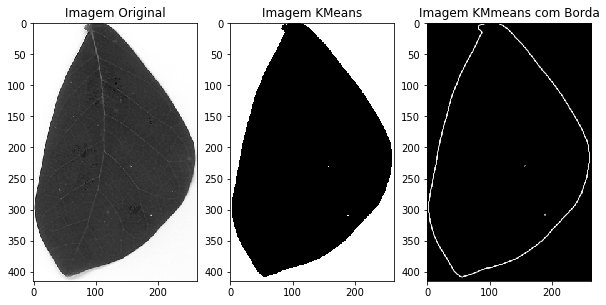

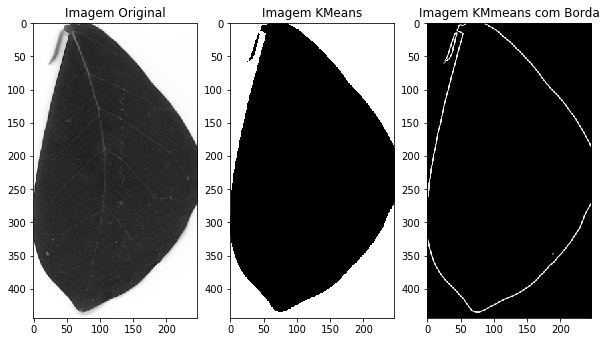

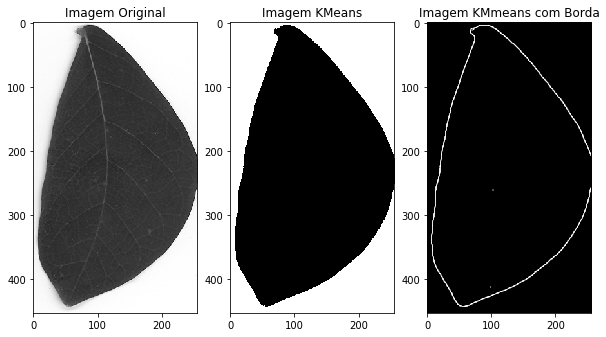

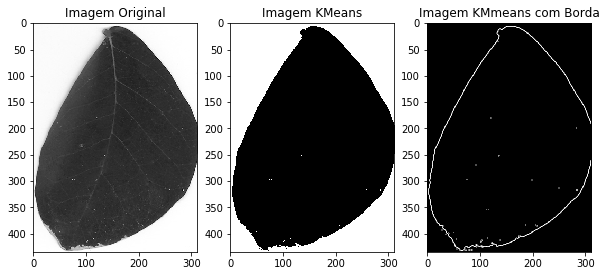

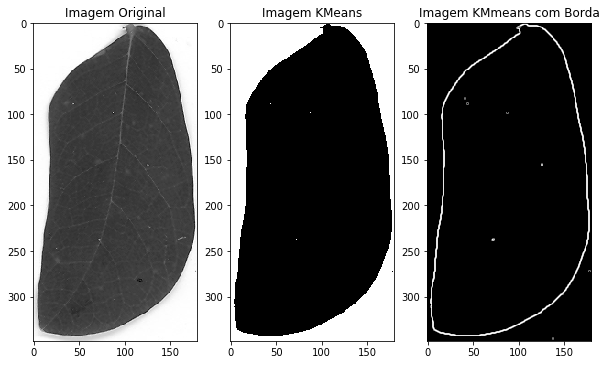

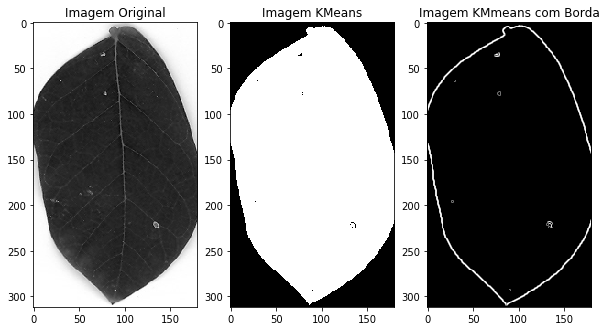

In [9]:
from sklearn.cluster import KMeans
from skimage.filters import sobel
from skimage.io import imread
import matplotlib.pyplot as plt
import glob as g

data_base = g.glob('./*.tif')
imagem = []
for i,j in enumerate(data_base): 
    aux = imread(j)
    imagem.append(aux)
    kmeans = KMeans(n_clusters=2).fit(imagem[i].reshape((-1,1)))
    imagem_kmeans = kmeans.labels_
    imagem_kmeans = imagem_kmeans.reshape(imagem[i].shape)
    
    imagem_sobel = sobel(imagem_kmeans)
    
    fig,ax = plt.subplots(1,3,figsize=(10,20))
    ax[0].imshow(imagem[i],cmap = "gray")
    ax[0].set_title('Imagem Original')
    ax[1].imshow(imagem_kmeans,cmap = "gray")
    ax[1].set_title('Imagem KMeans')
    ax[2].imshow(imagem_sobel,cmap = "gray")
    ax[2].set_title('Imagem KMmeans com Borda')   

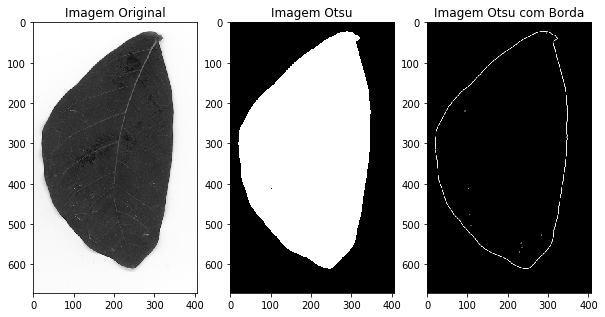

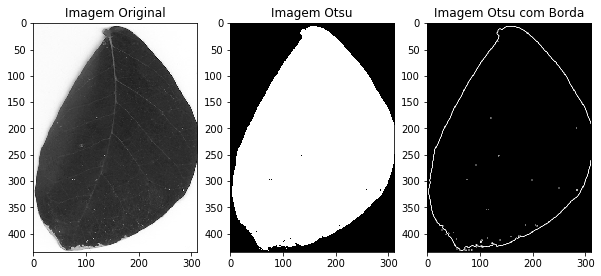

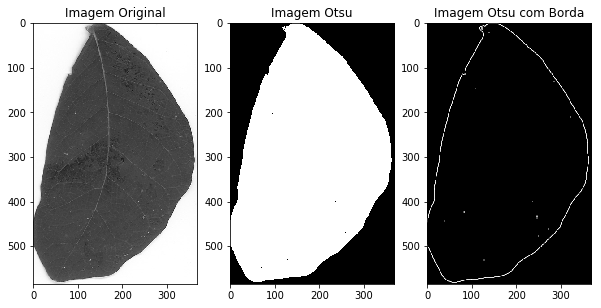

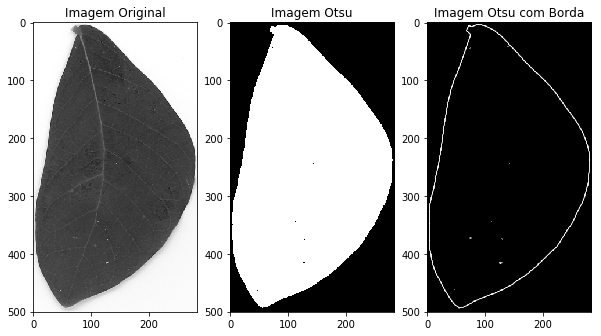

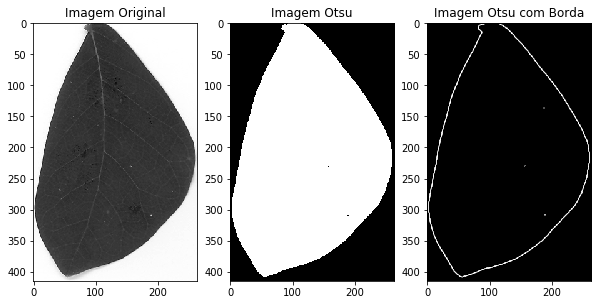

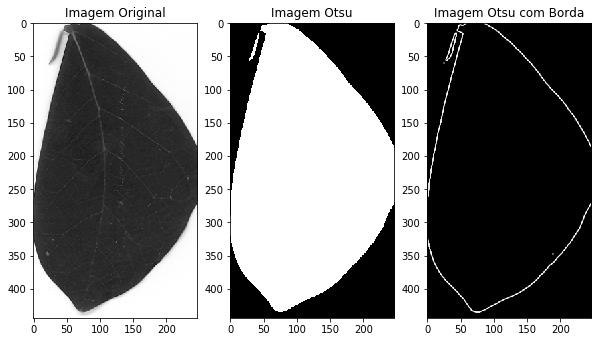

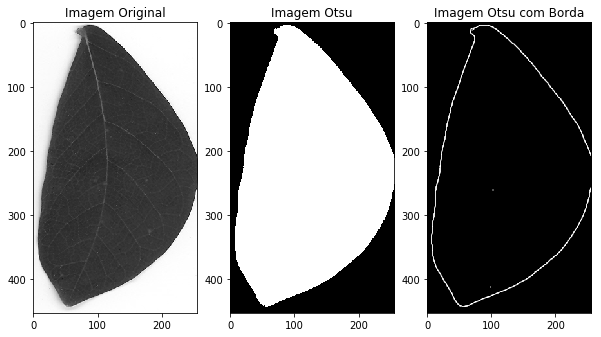

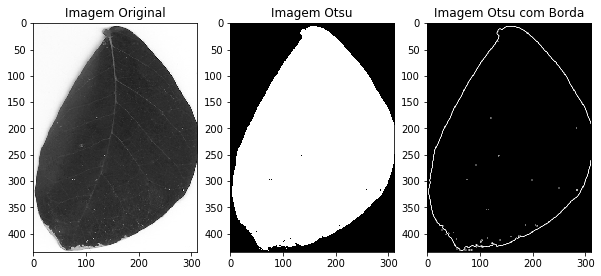

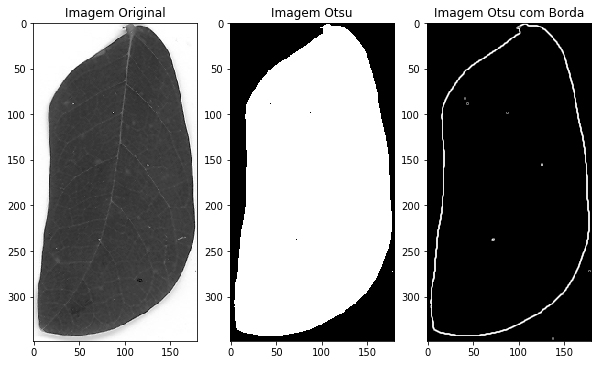

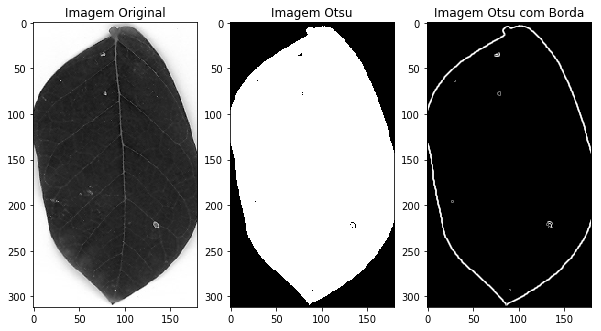

In [10]:
from skimage.filters import threshold_otsu

data_base = g.glob('./*.tif')
imagem = []
for i,j in enumerate(data_base): 
    aux = imread(j)
    imagem.append(aux)
    otsu = threshold_otsu(imagem[i])
    preto_branco = imagem[i] < otsu
    
    otsu_sobel = sobel(preto_branco)
    
    fig,ax = plt.subplots(1,3,figsize=(10,20))
    ax[0].imshow(imagem[i],cmap = "gray")
    ax[0].set_title('Imagem Original')
    ax[1].imshow(preto_branco,cmap = "gray")
    ax[1].set_title('Imagem Otsu')
    ax[2].imshow(otsu_sobel,cmap = "gray")
    ax[2].set_title('Imagem Otsu com Borda') 

## Ao se aplicar o filtro de borda sobre a imagem depois do KMeans e o Otsu, fica praticamente impossível de identificar alguma diferença. A diferença é nítida antes de aplicar o filtro de borda. Onde no KMeans é branco, no Otsu é preto e vice-versa. 